In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

def weighted_choice(values, weights, size=1, rng=rng):
    weights = np.array(weights, dtype=float)
    weights = weights / weights.sum()
    return rng.choice(values, size=size, p=weights)

def clamp(x, lo, hi):
    return max(lo, min(hi, x))


In [2]:
mylahore_menu = pd.DataFrame([
    # Starters
    {"item":"Samosas (3)", "category":"Starter", "price":4.95, "cogs_pct":0.28, "prep_complexity":1, "tags":["veg","snack"]},
    {"item":"Chicken Wings", "category":"Starter", "price":5.95, "cogs_pct":0.35, "prep_complexity":2, "tags":["chicken","snack"]},
    {"item":"Seekh Kebabs", "category":"Starter", "price":6.95, "cogs_pct":0.38, "prep_complexity":2, "tags":["meat","grill"]},

    # Mains
    {"item":"Butter Chicken Curry", "category":"Main", "price":12.95, "cogs_pct":0.36, "prep_complexity":3, "tags":["chicken","curry"]},
    {"item":"Lamb Karahi", "category":"Main", "price":14.95, "cogs_pct":0.40, "prep_complexity":3, "tags":["meat","curry"]},
    {"item":"Veg Biryani", "category":"Main", "price":12.95, "cogs_pct":0.32, "prep_complexity":3, "tags":["veg","rice"]},
    {"item":"Chicken Biryani", "category":"Main", "price":13.95, "cogs_pct":0.36, "prep_complexity":3, "tags":["chicken","rice"]},

    # Burgers / Fusion
    {"item":"Smash Burger", "category":"Fusion", "price":10.95, "cogs_pct":0.38, "prep_complexity":2, "tags":["meat","fast"]},
    {"item":"Grilled Chicken Burger", "category":"Fusion", "price":10.45, "cogs_pct":0.36, "prep_complexity":2, "tags":["chicken","fast"]},

    # Sides
    {"item":"Naan Bread", "category":"Side", "price":2.95, "cogs_pct":0.22, "prep_complexity":1, "tags":["bread"]},
    {"item":"Chips", "category":"Side", "price":3.25, "cogs_pct":0.20, "prep_complexity":1, "tags":["fast"]},

    # Desserts / Drinks
    {"item":"Milk Cake", "category":"Dessert", "price":5.95, "cogs_pct":0.30, "prep_complexity":1, "tags":["sweet"]},
    {"item":"Soft Drink", "category":"Drink", "price":2.75, "cogs_pct":0.12, "prep_complexity":1, "tags":["drink"]},
])

jaffa_menu = pd.DataFrame([
    # Mezze / starters
    {"item":"Hummus", "category":"Mezze", "price":4.99, "cogs_pct":0.22, "prep_complexity":1, "tags":["veg","dip"]},
    {"item":"Hummus Shawarma", "category":"Mezze", "price":5.80, "cogs_pct":0.30, "prep_complexity":2, "tags":["chicken","dip"]},
    {"item":"Falafel (wrap)", "category":"Wrap", "price":3.25, "cogs_pct":0.24, "prep_complexity":1, "tags":["veg","fast"]},
    {"item":"Vine Leaves (Warak Inab)", "category":"Mezze", "price":5.50, "cogs_pct":0.25, "prep_complexity":2, "tags":["veg"]},

    # Wraps / sandwiches
    {"item":"Chicken Shawarma (wrap)", "category":"Wrap", "price":3.90, "cogs_pct":0.30, "prep_complexity":2, "tags":["chicken","fast"]},
    {"item":"Shish Tawook (wrap)", "category":"Wrap", "price":5.20, "cogs_pct":0.33, "prep_complexity":2, "tags":["chicken","grill","fast"]},
    {"item":"Kofta Kebab (wrap)", "category":"Wrap", "price":5.50, "cogs_pct":0.36, "prep_complexity":2, "tags":["meat","grill","fast"]},

    # Plates / grills
    {"item":"Mixed Grill (plate)", "category":"Main", "price":9.00, "cogs_pct":0.42, "prep_complexity":3, "tags":["meat","grill"]},
    {"item":"Chicken Shawarma (plate)", "category":"Main", "price":8.50, "cogs_pct":0.38, "prep_complexity":3, "tags":["chicken"]},

    # Add-ons
    {"item":"Pickles (Kabees)", "category":"Side", "price":4.50, "cogs_pct":0.18, "prep_complexity":1, "tags":["side"]},
    {"item":"Soft Drink", "category":"Drink", "price":1.80, "cogs_pct":0.12, "prep_complexity":1, "tags":["drink"]},
])

mylahore_menu["restaurant"] = "MyLahore"
jaffa_menu["restaurant"] = "Jaffa"

menu = pd.concat([mylahore_menu, jaffa_menu], ignore_index=True)

menu.head()


,item,category,price,cogs_pct,prep_complexity,tags,restaurant
0,Samosas (3),Starter,4.95,0.28,1,"[veg, snack]",MyLahore
1,Chicken Wings,Starter,5.95,0.35,2,"[chicken, snack]",MyLahore
2,Seekh Kebabs,Starter,6.95,0.38,2,"[meat, grill]",MyLahore
3,Butter Chicken Curry,Main,12.95,0.36,3,"[chicken, curry]",MyLahore
4,Lamb Karahi,Main,14.95,0.40,3,"[meat, curry]",MyLahore


In [3]:
segments = pd.DataFrame([
    {"segment":"Students", "share":0.30, "party_size_mu":2.2, "party_size_sd":0.8,
     "price_sensitivity":1.10, "delivery_rate":0.45,
     "tag_pref":{"fast":1.4, "veg":1.1, "chicken":1.2, "sweet":0.9, "grill":1.0, "curry":1.1, "rice":1.0, "dip":1.1}},
    {"segment":"Families", "share":0.18, "party_size_mu":4.0, "party_size_sd":1.0,
     "price_sensitivity":0.95, "delivery_rate":0.20,
     "tag_pref":{"curry":1.3, "rice":1.2, "sweet":1.2, "grill":1.1, "veg":1.0, "fast":0.8, "dip":1.0}},
    {"segment":"Local Regulars", "share":0.22, "party_size_mu":2.6, "party_size_sd":0.9,
     "price_sensitivity":1.00, "delivery_rate":0.30,
     "tag_pref":{"grill":1.2, "dip":1.2, "veg":1.1, "chicken":1.1, "meat":1.1, "curry":1.0, "fast":1.0}},
    {"segment":"Late-night", "share":0.15, "party_size_mu":2.4, "party_size_sd":0.9,
     "price_sensitivity":1.05, "delivery_rate":0.55,
     "tag_pref":{"fast":1.5, "drink":1.1, "meat":1.1, "chicken":1.1, "sweet":0.8, "dip":1.0}},
    {"segment":"Delivery-first", "share":0.15, "party_size_mu":2.0, "party_size_sd":0.6,
     "price_sensitivity":1.15, "delivery_rate":0.85,
     "tag_pref":{"fast":1.4, "dip":1.2, "chicken":1.2, "veg":1.1, "grill":1.0, "curry":1.0}},
])

segments


,segment,share,party_size_mu,party_size_sd,price_sensitivity,delivery_rate,tag_pref
0,Students,0.30,2.2,0.8,1.10,0.45,"{'fast': 1.4, 'veg': 1.1, 'chicken': 1.2, 'swe..."
1,Families,0.18,4.0,1.0,0.95,0.20,"{'curry': 1.3, 'rice': 1.2, 'sweet': 1.2, 'gri..."
2,Local Regulars,0.22,2.6,0.9,1.00,0.30,"{'grill': 1.2, 'dip': 1.2, 'veg': 1.1, 'chicke..."
3,Late-night,0.15,2.4,0.9,1.05,0.55,"{'fast': 1.5, 'drink': 1.1, 'meat': 1.1, 'chic..."
4,Delivery-first,0.15,2.0,0.6,1.15,0.85,"{'fast': 1.4, 'dip': 1.2, 'chicken': 1.2, 'veg..."


In [4]:
restaurant_params = {
    "MyLahore": {
        "avg_covers_weekday": 220,   # people/day Mon-Thu
        "avg_covers_weekend": 360,   # people/day Fri-Sun
        "avg_items_per_person": 1.35,
        "dessert_attach_rate": 0.22,
        "drink_attach_rate": 0.55,
        "delivery_fee_income_per_order": 0.35,  # net platform/fees (can be negative too)
        "fixed_costs_weekly": 18500,  # rent, rates, utilities, salaried staff, etc.
        "labor_var_pct": 0.12,        # variable labour as % revenue
    },
    "Jaffa": {
        "avg_covers_weekday": 150,
        "avg_covers_weekend": 240,
        "avg_items_per_person": 1.20,
        "dessert_attach_rate": 0.08,
        "drink_attach_rate": 0.35,
        "delivery_fee_income_per_order": 0.20,
        "fixed_costs_weekly": 9800,
        "labor_var_pct": 0.10,
    }
}


In [5]:
def score_item(row, seg):
    base = 1.0
    # tag preference multiplier
    for t in row["tags"]:
        base *= seg["tag_pref"].get(t, 1.0)
    # price penalty
    price_pen = (row["price"] / 10.0) ** seg["price_sensitivity"]
    return base / price_pen

def choose_items_for_person(menu_df, seg, n_items, rng=rng):
    scores = menu_df.apply(lambda r: score_item(r, seg), axis=1).to_numpy()
    probs = scores / scores.sum()
    chosen_idx = rng.choice(menu_df.index, size=n_items, p=probs, replace=True)
    return menu_df.loc[chosen_idx]


In [6]:
def simulate_week(menu, segments, restaurant_params, start_date="2026-02-02", rng=rng):
    # start_date should be a Monday ideally
    start = pd.Timestamp(start_date)
    days = [start + pd.Timedelta(days=i) for i in range(7)]
    day_names = [d.day_name() for d in days]

    seg_list = segments["segment"].tolist()
    seg_weights = segments["share"].tolist()

    orders = []
    order_id = 1

    for restaurant, params in restaurant_params.items():
        r_menu = menu[menu["restaurant"] == restaurant].reset_index(drop=True)

        for d, dn in zip(days, day_names):
            weekend = dn in ["Friday", "Saturday", "Sunday"]
            covers = params["avg_covers_weekend"] if weekend else params["avg_covers_weekday"]

            # add some noise
            covers = int(max(0, rng.normal(covers, covers*0.08)))

            # turn "covers" into parties
            # assume avg party ~2.6 with some variation
            parties = int(max(1, covers / rng.normal(2.6, 0.3)))

            for _ in range(parties):
                seg_name = weighted_choice(seg_list, seg_weights, size=1, rng=rng)[0]
                seg = segments.set_index("segment").loc[seg_name].to_dict()

                party_size = int(max(1, rng.normal(seg["party_size_mu"], seg["party_size_sd"])))
                is_delivery = rng.random() < seg["delivery_rate"]

                # items per person
                ipp = max(1, int(round(rng.normal(params["avg_items_per_person"], 0.15))))
                line_items = []

                for p in range(party_size):
                    chosen = choose_items_for_person(r_menu[r_menu["category"].isin(["Starter","Main","Fusion","Wrap","Mezze"])],
                                                     seg, n_items=ipp, rng=rng)
                    line_items.append(chosen)

                    # attach drinks/desserts probabilistically
                    if rng.random() < params["drink_attach_rate"]:
                        drink = r_menu[r_menu["category"]=="Drink"].sample(1, random_state=int(rng.integers(1, 1e9)))
                        line_items.append(drink)
                    if rng.random() < params["dessert_attach_rate"]:
                        dessert = r_menu[r_menu["category"]=="Dessert"]
                        if len(dessert) > 0:
                            dessert = dessert.sample(1, random_state=int(rng.integers(1, 1e9)))
                            line_items.append(dessert)

                lines = pd.concat(line_items, ignore_index=True)
                lines["order_id"] = order_id
                lines["date"] = d.date()
                lines["day_name"] = dn
                lines["restaurant"] = restaurant
                lines["segment"] = seg_name
                lines["channel"] = "Delivery" if is_delivery else "Dine-in"
                orders.append(lines)
                order_id += 1

    orders_df = pd.concat(orders, ignore_index=True)

    # compute financials per line
    orders_df["revenue"] = orders_df["price"]
    orders_df["cogs"] = orders_df["price"] * orders_df["cogs_pct"]

    return orders_df

orders_week = simulate_week(menu, segments, restaurant_params, start_date="2026-02-02")
orders_week.head()


,item,category,price,cogs_pct,prep_complexity,tags,restaurant,order_id,date,day_name,segment,channel,revenue,cogs
0,Chicken Biryani,Main,13.95,0.36,3,"[chicken, rice]",MyLahore,1,2026-02-02,Monday,Delivery-first,Delivery,13.95,5.0220
1,Milk Cake,Dessert,5.95,0.30,1,[sweet],MyLahore,1,2026-02-02,Monday,Delivery-first,Delivery,5.95,1.7850
2,Chicken Wings,Starter,5.95,0.35,2,"[chicken, snack]",MyLahore,1,2026-02-02,Monday,Delivery-first,Delivery,5.95,2.0825
3,Samosas (3),Starter,4.95,0.28,1,"[veg, snack]",MyLahore,2,2026-02-02,Monday,Late-night,Delivery,4.95,1.3860
4,Smash Burger,Fusion,10.95,0.38,2,"[meat, fast]",MyLahore,2,2026-02-02,Monday,Late-night,Delivery,10.95,4.1610


In [7]:
def weekly_profit_report(orders_df, restaurant_params):
    # order-level for delivery fee handling
    order_level = (orders_df.groupby(["restaurant","order_id","channel"], as_index=False)
                   .agg(order_revenue=("revenue","sum"),
                        order_cogs=("cogs","sum")))

    # add delivery fee income (net)
    def delivery_income(row):
        p = restaurant_params[row["restaurant"]]["delivery_fee_income_per_order"]
        return p if row["channel"] == "Delivery" else 0.0

    order_level["delivery_net_income"] = order_level.apply(delivery_income, axis=1)

    # restaurant totals
    totals = (order_level.groupby("restaurant", as_index=False)
              .agg(revenue=("order_revenue","sum"),
                   cogs=("order_cogs","sum"),
                   delivery_net_income=("delivery_net_income","sum"),
                   delivery_orders=("channel", lambda x: (x=="Delivery").sum()),
                   total_orders=("channel","count")))

    # compute labor + fixed
    totals["labor_var"] = totals.apply(lambda r: r["revenue"] * restaurant_params[r["restaurant"]]["labor_var_pct"], axis=1)
    totals["fixed_costs_weekly"] = totals["restaurant"].map(lambda r: restaurant_params[r]["fixed_costs_weekly"])

    totals["gross_profit"] = totals["revenue"] - totals["cogs"] + totals["delivery_net_income"]
    totals["net_profit_week"] = totals["gross_profit"] - totals["labor_var"] - totals["fixed_costs_weekly"]

    # yearly projection (simple *52)
    totals["net_profit_year"] = totals["net_profit_week"] * 52
    totals["revenue_year"] = totals["revenue"] * 52

    # margins
    totals["gross_margin_pct"] = totals["gross_profit"] / totals["revenue"]
    totals["net_margin_pct"] = totals["net_profit_week"] / totals["revenue"]

    return totals.sort_values("net_profit_week", ascending=False)

weekly_report = weekly_profit_report(orders_week, restaurant_params)
weekly_report


,restaurant,revenue,cogs,delivery_net_income,delivery_orders,total_orders,labor_var,fixed_costs_weekly,gross_profit,net_profit_week,net_profit_year,revenue_year,gross_margin_pct,net_margin_pct
0,Jaffa,6200.34,1828.8598,43.40,217,474,620.034,9800,4414.8802,-6005.1538,-312267.9976,322417.68,0.712038,-0.968520
1,MyLahore,21380.55,6916.6575,122.85,351,760,2565.666,18500,14586.7425,-6478.9235,-336904.0220,1111788.60,0.682244,-0.303029


In [8]:
# Segment mix by restaurant
seg_mix = (orders_week.groupby(["restaurant","segment"], as_index=False)
           .agg(lines=("item","count"),
                revenue=("revenue","sum"))
           .sort_values(["restaurant","revenue"], ascending=[True,False]))

seg_mix


,restaurant,segment,lines,revenue
1,Jaffa,Families,401,1816.29
4,Jaffa,Students,407,1738.50
3,Jaffa,Local Regulars,325,1410.47
2,Jaffa,Late-night,177,744.23
0,Jaffa,Delivery-first,114,490.85
9,MyLahore,Students,836,5792.30
6,MyLahore,Families,766,5562.00
8,MyLahore,Local Regulars,741,4975.25
7,MyLahore,Late-night,451,3188.75
5,MyLahore,Delivery-first,271,1862.25


In [9]:
# Average item price by category / restaurant
cat = (orders_week.groupby(["restaurant","category"], as_index=False)
       .agg(avg_price=("price","mean"),
            revenue=("revenue","sum"),
            items=("item","count"))
       .sort_values(["restaurant","revenue"], ascending=[True,False]))

cat


,restaurant,category,avg_price,revenue,items
3,Jaffa,Wrap,4.331107,2659.30,614
2,Jaffa,Mezze,5.427763,1650.04,304
1,Jaffa,Main,8.751773,1234.00,141
0,Jaffa,Drink,1.800000,657.00,365
7,MyLahore,Main,13.601543,7494.45,551
8,MyLahore,Starter,5.893709,5339.70,906
6,MyLahore,Fusion,10.686292,4092.85,383
5,MyLahore,Drink,2.750000,2436.50,886
4,MyLahore,Dessert,5.950000,2017.05,339


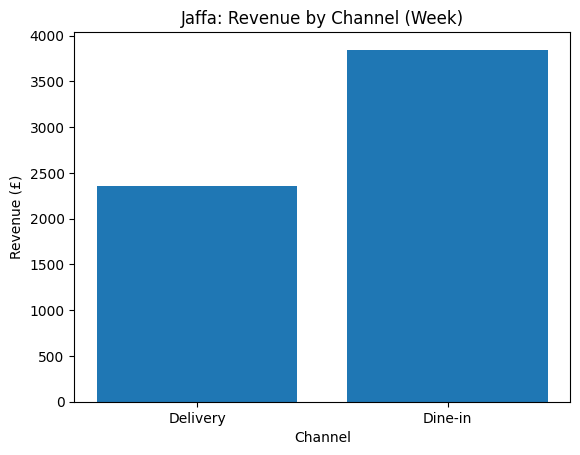

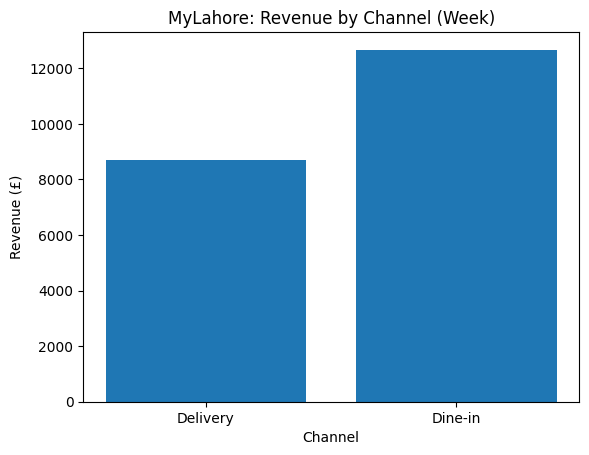

In [10]:
# Revenue share by channel (dine-in vs delivery)
channel_rev = (orders_week.groupby(["restaurant","channel"], as_index=False)
               .agg(revenue=("revenue","sum")))

for r in channel_rev["restaurant"].unique():
    df = channel_rev[channel_rev["restaurant"]==r]
    plt.figure()
    plt.title(f"{r}: Revenue by Channel (Week)")
    plt.bar(df["channel"], df["revenue"])
    plt.xlabel("Channel")
    plt.ylabel("Revenue (£)")
    plt.show()


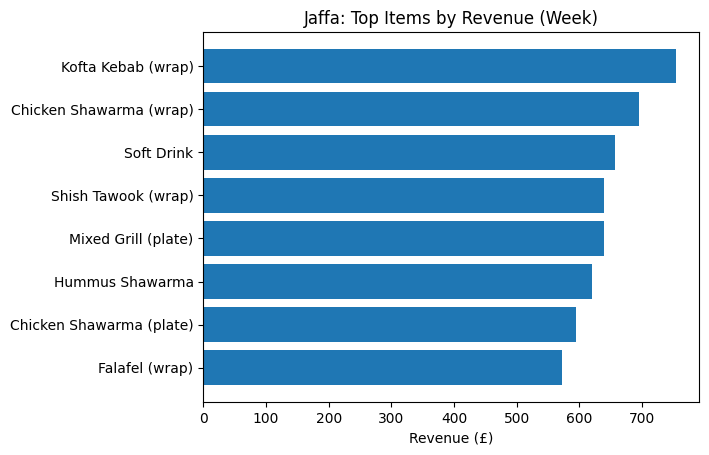

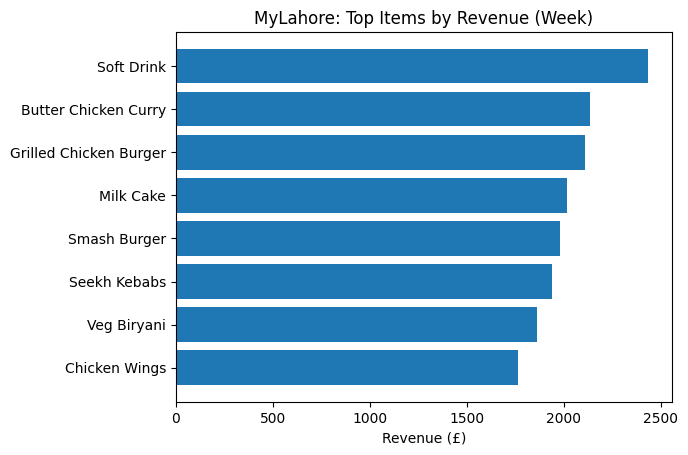

In [11]:
# Top 8 selling items by revenue per restaurant
top_items = (orders_week.groupby(["restaurant","item"], as_index=False)
             .agg(revenue=("revenue","sum"), qty=("item","count"))
             .sort_values(["restaurant","revenue"], ascending=[True,False]))

for r in top_items["restaurant"].unique():
    df = top_items[top_items["restaurant"]==r].head(8)
    plt.figure()
    plt.title(f"{r}: Top Items by Revenue (Week)")
    plt.barh(df["item"][::-1], df["revenue"][::-1])
    plt.xlabel("Revenue (£)")
    plt.ylabel("")
    plt.show()


In [12]:
def monte_carlo_weeks(n_weeks=100, rng_seed=123):
    local_rng = np.random.default_rng(rng_seed)
    reports = []
    for i in range(n_weeks):
        orders = simulate_week(menu, segments, restaurant_params, start_date="2026-02-02", rng=local_rng)
        rep = weekly_profit_report(orders, restaurant_params)
        rep["sim_week"] = i+1
        reports.append(rep)
    return pd.concat(reports, ignore_index=True)

mc = monte_carlo_weeks(100, rng_seed=2026)

summary = (mc.groupby("restaurant", as_index=False)
           .agg(net_profit_week_mean=("net_profit_week","mean"),
                net_profit_week_p10=("net_profit_week", lambda s: np.percentile(s, 10)),
                net_profit_week_p90=("net_profit_week", lambda s: np.percentile(s, 90)),
                revenue_week_mean=("revenue","mean")))
summary


,restaurant,net_profit_week_mean,net_profit_week_p10,net_profit_week_p90,revenue_week_mean
0,Jaffa,-5812.497854,-6148.37784,-5423.85922,6470.8062
1,MyLahore,-6191.712480,-7034.35265,-5226.05760,21889.8370
